# Training Chatbots with RL

**Objective:**  
Train an entertainment human-mimicking chatbot using RL

**Overview:**  
A natural language model has been a science fiction thing for a long time. The objective of this notebook is to train a chatbot to respond back to a simple dialoge, not "Luke Skywalker" talking to his ship! :)
The idea is based on a recurrent modle published back in 2014 (https://arxiv.org/abs/1406.6247). Although the papaer addresses reducing the computational expense of convolutional networks in image classificuations and objects detection, its implementation in NLP is huge!  
The agent observes information in a local region instead of looking at the whole environent as traditional CNN agents do. It then applies sequential decesion process to learn how to better to focus its attention on areas that provides the best results....(continue with the paper)   

## RNNs
A unique feature of NLPs that sets them apart from computer vision and other domains, is thier ability to process variable-length inputs. i.e. words, sentences and paragraphs. A second feature is to understand a sequence of inputs and make one or a sequence of predictions.  
Recurrent Neural Networks can do both. Even though they have fixed input and output, they can apply that to a sequence of inputs and pass information along this sequence in the form of hidden-state, which has fixed shape (size).   

Refer to http://cs224d.stanford.edu/ for more information about RNN

## Embedding
Think of embedding layers as an advanced v-lookup that maps each word to a fixed length tensor. These tensors are trained on a large set of vocabulary, phrases and even abbreviations. This is the practical replacement of one-hot encoding as it solves the following problems:  
1. Our vocabulary dataset could contain hundreds of thousands of words, which makes our input extremely large.
2. Uneven frequency of vocabulary: in one-hot encoding common and uncommon words get the same representation which makes our use of space very inefficient.
3. Word's relations: synonomus and similar words will be represented differently. Other words often used together like the "United States" and "good job"  
     
There are many ways to use embedding in your model. You can either download a pretrained set for the language you're using (GloVe or word2vec), or initiate randomly and train them on your own dataset which what i'm going to do

## Encoder-Decoder model:
This is the workhorse of every translating engine in NLP. It consists of two parts; the first part takes an input of N sequence of words in language A, then sequeeze it into a representation of fixed-length (encoder). The second part (decoder) takes this representation and generates an output from it in language B. This is called seq2seq model.


## Log Likelihood training:
Take the example of training an French-English translator using seq2seq training. The obvious approach is to feed the French sentence into the encoder. Get its tensor representation (hidden-state of the last layer). And then feed it to the decoder along with the first token $<BEG>$ to get a probability distribution of the first token in the translated sentence

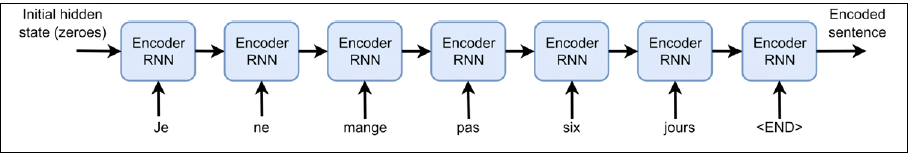

As for the remaining tokens in our sentence, there are two approaches:  
1. **Teacher forcing:** this is done by feeding the remaining tokens one by one, and calculate the cross-entropy loss between RNN output and the next token from the correct translation during training. Then sum all the losses and backpropagate. 
This approach comes with its own problems after trianing the model. Since we no longer have the encoded output to feed the decoder the natural way is to encode our sequence one by one and then use its output to decode it. Which is something our model has not been trained to do and it has the potential to produce rubbish!

2. **Curriculum learning:** in this approach we feed the inputs to the encoder one by one i.e. the same way we intend to use it. And use the output of each step as an input for the decoder, asking it to produce one token each time. The log-likelihood calculation is exactly the same as we use cross-entropy between output 1 and token 2 of teh correct sentence. The downside of this approach is that it takes a long time to train the model.

In practice it's better to use a combination of both: begin with **teacher-forcing** then fine-tune the model using **curicculum-learning**


## Blilingual Evaluation Understudy (BLEU) score:
A standard metric used to evaluate the quality of machine translation.  
`conda install nltk -c anaconda`


## RL in seq2seq:
Our decoder outputs the probability distribution at each step, which is very similar to policy gradient model. From this perspective we can consider our decoder an agent trying to select which action (token) to use at each step.  
This is actually good because by sampling from that distribution gives more variaties and appear more human like.  For exmaple: there are many responses to the question "hi, how are you?". You can say "I'm good, thank you?" or "I'm not too bad", or even "I'm not good"..etc. They are all correct! Finding the average of all valid answers and then sampling from that distribution makes our agent appear more natural!


## The Algorithm
The Reinforce method has the objective of maximizing  
$𝔼𝑠~𝑑,𝑎~𝜋(𝑎|𝑠)𝑄(𝑠,𝑎)log𝜋(𝑎|𝑠).$  
1. For every sample in the dataset, obtain th encoded representation, E, using the encoder RNN
2. Initialize the current token with the special begin token $T= <BEG>$
3. Initialize the output sequence withthe empty sequence $Out=[]$
4. While $T \neq <END>$:
    * Get teh probability distribution of the tokens and the new hidden state, passing the current token and the hidden state: *p,hn=Decoder(T,E)*
    * Sample the output token, $T_{out}$, from the probability distribution  
    * Remember the probability distribution $p$  
    * Append $T_{out}$ to the output sequence: $Out += T_{out}$
    * Set the current token $T \leftarrow T_{out}, E \leftarrow H$
5. Calculate BLEU or another metric between Out and the reference sequences: $Q = BLEU(Out,Out_{ref})$
6. Estimate the gradients: $\nabla J = \sum_T Q\nabla \log p(T)$
7. Update the model using SGD
8. Repeat until conversion

In [3]:
import nltk.translate.bleu_score as belu

In [ ]:
belu.